# Preparing the two dataset

In [1]:
# Imports
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [156]:
# Read non-zero data and bitcoin prices data
#nozerosent = pd.read_csv('C:\\Users\\Emilia Marchese\\Untitled Folder 4\\nozeros.csv')
nozerosent = pd.read_csv('C:\\Users\\Emilia Marchese\\Downloads\\nozerowsentiment.csv')
prices = pd.read_csv('C:\\Users\\Emilia Marchese\\Untitled Folder 4\\btc-price-weekly.csv')

In [157]:

prices['timestamp'] = prices.timestamp.apply(
    lambda x: datetime.datetime.strptime(x,'%d/%m/%Y %H:%M'))

In [158]:
nozerosent['timestamp'] = pd.to_datetime(nozerosent['timestamp']).dt.tz_localize(None)

In [159]:
prices.sort_values(by = 'timestamp')
prices.head(10)

,timestamp,open,high,low,close,volume-btc,volume-usd,weighted-price
0,2016-01-04,433.20,465.00,424.06,448.84,51166.49,22648394.06,442.64
1,2016-01-11,448.84,451.13,352.00,386.91,95829.85,38739810.50,404.26
2,2016-01-18,387.80,422.98,372.53,386.40,79652.60,31340893.92,393.47
3,2016-01-25,386.37,405.97,363.73,375.64,51886.76,20034038.95,386.11
4,2016-02-01,376.38,391.88,364.70,375.39,50803.49,19180444.71,377.54
5,2016-02-08,375.39,390.99,369.12,390.99,46407.92,17577126.58,378.75
6,2016-02-15,390.99,443.96,390.59,434.63,63100.44,26103084.08,413.68
7,2016-02-22,434.63,447.99,409.07,431.07,48301.08,20690020.19,428.36
8,2016-02-29,431.07,440.99,382.00,399.83,56403.49,23605713.48,418.52
9,2016-03-07,399.77,421.91,393.11,410.90,37929.39,15626235.17,411.98


In [160]:
nozerosent.head(10)

,timestamp,wsentiment
0,2009-06-08,7.013375
1,2009-06-15,NaN
2,2009-06-22,NaN
3,2009-06-29,NaN
4,2009-07-06,NaN
5,2009-07-13,NaN
6,2009-07-20,NaN
7,2009-07-27,NaN
8,2009-08-03,NaN
9,2009-08-10,NaN


In [7]:
print(nozerosent.dtypes)
print(prices.dtypes)

timestamp    datetime64[ns]
sentiment           float64
dtype: object
timestamp         datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume-btc               float64
volume-usd               float64
weighted-price           float64
dtype: object


In [161]:
prices = prices.drop(columns = ['open', 'high', 'low', 'weighted-price'])

In [162]:
# Dropping observations before 4.1.2016 from nozerosent
nozerosent = nozerosent[~(nozerosent['timestamp'] < '2016-01-04')]
nozerosent = nozerosent[~(nozerosent['timestamp'] > '2019-04-01')]
prices = prices[~(prices['timestamp'] < '2016-01-04')]

In [163]:
nozerosent.sort_values(by = 'timestamp')
nozerosent.head(50)

,timestamp,wsentiment
343,2016-01-04,-0.557885
344,2016-01-11,11.048047
345,2016-01-18,21.289880
346,2016-01-25,0.374713
347,2016-02-01,-0.354764
348,2016-02-08,-3.790233
349,2016-02-15,1.230850
350,2016-02-22,0.622392
351,2016-02-29,-0.066125
352,2016-03-07,1.066750


In [164]:
prices.sort_values(by = 'timestamp')
prices.head(50)

,timestamp,close,volume-btc,volume-usd
0,2016-01-04,448.84,51166.49,22648394.06
1,2016-01-11,386.91,95829.85,38739810.50
2,2016-01-18,386.40,79652.60,31340893.92
3,2016-01-25,375.64,51886.76,20034038.95
4,2016-02-01,375.39,50803.49,19180444.71
5,2016-02-08,390.99,46407.92,17577126.58
6,2016-02-15,434.63,63100.44,26103084.08
7,2016-02-22,431.07,48301.08,20690020.19
8,2016-02-29,399.83,56403.49,23605713.48
9,2016-03-07,410.90,37929.39,15626235.17


In [165]:
prices = prices.set_index('timestamp')
nozerosent = nozerosent.set_index('timestamp')
print(prices.head(5))
print(nozerosent.head(5))

             close  volume-btc   volume-usd
timestamp                                  
2016-01-04  448.84    51166.49  22648394.06
2016-01-11  386.91    95829.85  38739810.50
2016-01-18  386.40    79652.60  31340893.92
2016-01-25  375.64    51886.76  20034038.95
2016-02-01  375.39    50803.49  19180444.71
            wsentiment
timestamp             
2016-01-04   -0.557885
2016-01-11   11.048047
2016-01-18   21.289880
2016-01-25    0.374713
2016-02-01   -0.354764


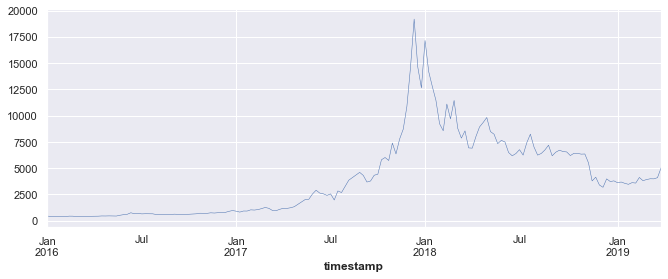

In [166]:
#Printing time series of both to see whether they are correlated 

import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
prices['close'].plot(linewidth=0.5);


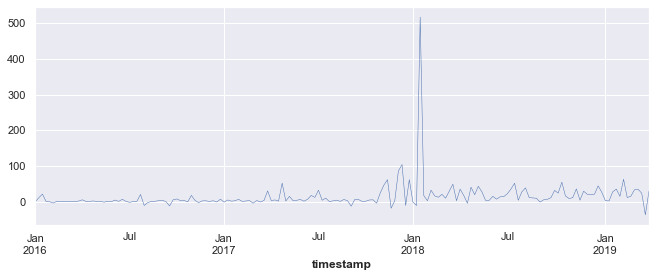

In [168]:
sns.set(rc={'figure.figsize':(11, 4)})
#nozerosent['sentiment'].plot(linewidth=0.5);
nozerosent['wsentiment'].plot(linewidth=0.5);

The trends of both prices and sentiment seem to be stochastic. 

In [170]:
# Concatenating into one data set
#dataset = pd.concat([nozerosent.sentiment, prices.close], axis = 1)
dataset = pd.concat([nozerosent.wsentiment, prices.close], axis = 1)

## Exploratory statistics

In [171]:
# Filling null values with previous values
dataset.fillna(method = 'pad')

,wsentiment,close
timestamp,,
2016-01-04,-0.557885,448.84
2016-01-11,11.048047,386.91
2016-01-18,21.289880,386.40
2016-01-25,0.374713,375.64
2016-02-01,-0.354764,375.39
...,...,...
2019-03-04,33.390416,3916.43
2019-03-11,34.683571,3990.00
2019-03-18,23.795523,3982.52


In [172]:
# Normality test 
from scipy import stats
stat,p = stats.normaltest(dataset.close)
print("Statistics = %.3f, p=%.3f" % (stat,p))
if p > 0.05:
    print("\nData looks Gaussian (fail to reject null hypothesis)")
else:
    print("\nData looks non-Gaussian (reject null hypothesis)")

Statistics = 38.574, p=0.000

Data looks non-Gaussian (reject null hypothesis)


count      170.000000
mean      4036.896059
std       3805.869070
min        375.390000
25%        705.377500
50%       3430.810000
75%       6411.560000
max      19187.780000
Name: close, dtype: float64

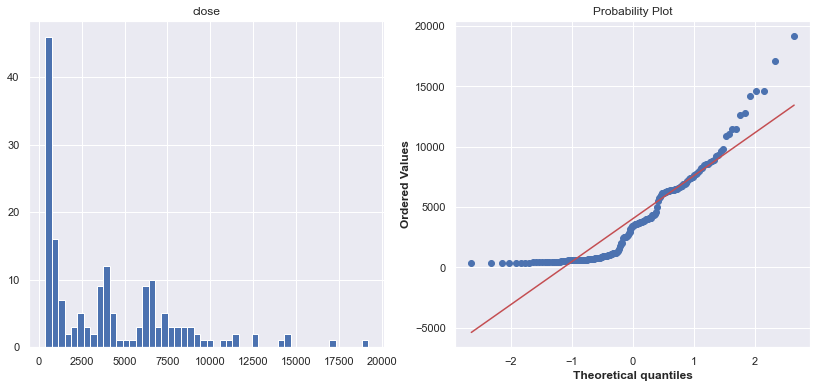

In [173]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
dataset['close'].hist(bins=50)
plt.title('close')
plt.subplot(1,2,2)
stats.probplot(dataset['close'], plot=plt);
dataset.close.describe().T

The disctribution of prices is not normal. 

<AxesSubplot:>

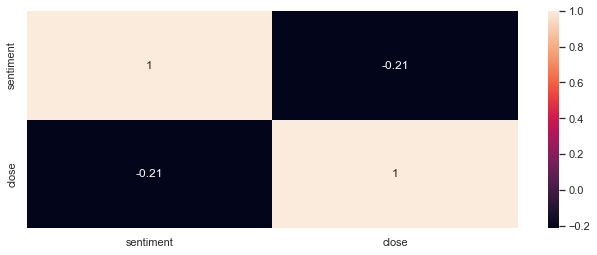

In [19]:
# Correlation heat map

corr = dataset.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True)

In [20]:
!pip install statsmodels

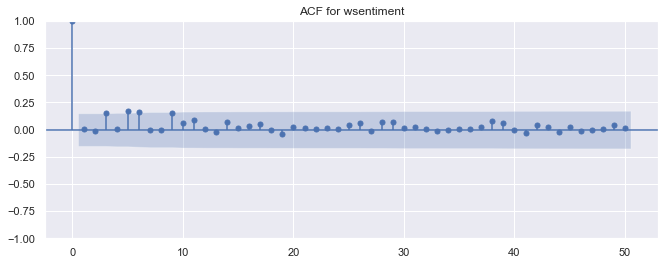

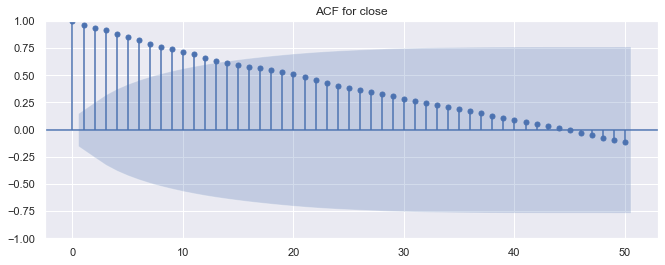

In [174]:
#Measuring autocorellation for the two time series using 50 lags 
import statsmodels.api as sm
for i in dataset:
  sm.graphics.tsa.plot_acf(dataset[i], lags = 50)
  plt.title('ACF for %s' % i)
  plt.show()

There seem to be a slight negative correlation between the closing price and the sentiment. 
Regarding autocorrelation, the autocorrelation for the previous lags of sentiment seems to be much less linear than the autocorrelation of close. 

## Granger causality test
The formal definition of Granger causality can be explained as, whether past values of x aid in the prediction of yt, conditional on having already accounted for the effects on yt of past values of y (and perhaps of past values of other variables). If they do, the x is said to “Granger cause” y. So, the basis behind VAR is that each of the time series in the system influences each other.

In [175]:
print(dataset.info)

<bound method DataFrame.info of             wsentiment    close
timestamp                      
2016-01-04   -0.557885   448.84
2016-01-11   11.048047   386.91
2016-01-18   21.289880   386.40
2016-01-25    0.374713   375.64
2016-02-01   -0.354764   375.39
...                ...      ...
2019-03-04   33.390416  3916.43
2019-03-11   34.683571  3990.00
2019-03-18   23.795523  3982.52
2019-03-25  -36.630879  4094.92
2019-04-01   29.755926  5041.39

[170 rows x 2 columns]>


In [176]:
#Let's try to predict for the next 3-4 weeks, so number of observations in the test data are 15

n_obs = 15
X_train, X_test = dataset[0:-n_obs], dataset[-n_obs:]
print(X_train.shape, X_test.shape)

(155, 2) (15, 2)


In [178]:
# We make both series stationary by first differencing
differenced = X_train.diff().dropna()
# We then conduct dick-fullers-tests to test for stationarity


print("ADF Close")
closeadfuller = sm.tsa.stattools.adfuller(differenced.close.values)
print('ADF Statistic: %f' % closeadfuller[0])
print('p-value: %f' % closeadfuller[1])
print('Critical Values:')
for key, value in closeadfuller[4].items():
    print('\t%s: %.3f' % (key, value))
    
print("ADF Sentiment")
#sentimentadfuller = sm.tsa.stattools.adfuller(differenced.sentiment.values)
sentimentadfuller = sm.tsa.stattools.adfuller(differenced.wsentiment.values)
print('ADF Statistic: %f' % sentimentadfuller[0])
print('p-value: %f' % sentimentadfuller[1])
print('Critical Values:')
for key, value in sentimentadfuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Close
ADF Statistic: -3.648706
p-value: 0.004895
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578
ADF Sentiment
ADF Statistic: -10.695430
p-value: 0.000000
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577


Both p-values are less than 0.05 so both series are stationary and we can reject the null hypothesis (there is no unit root)

In [25]:
# Now that we have a confirmation that both series are stationary, we use the granger test to see whether we can proceed with a 
# VAR model 
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12

test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

grangers_causality_matrix(dataset, variables = dataset.columns) 

,sentiment_x,close_x
sentiment_y,1.0000,0.1996
close_y,0.0238,1.0000


In the table above we observe that the p-value for sentiment_x causing close_y (row 2, column 1) is less than 0.05. Therefore we can reject the null hypothesis that the time series of sentiment has no effect on the time series of close, and we can conduct a VAR model to attempt to predict close based on the values of sentiment. 

# Conducting the VAR model

In [179]:
# Conducting the VAR model 
from statsmodels.tsa.api import VAR
mod = VAR(differenced)
res = mod.fit(maxlags=15, ic='bic')
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 22, Oct, 2021
Time:                     16:18:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    20.8702
Nobs:                     148.000    HQIC:                   20.5576
Log likelihood:          -1899.44    FPE:                6.84763e+08
AIC:                      20.3437    Det(Omega_mle):     5.78645e+08
--------------------------------------------------------------------
Results for equation wsentiment
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.715861         2.447858           -0.292           0.770
L1.wsentiment        -0.830561         0.076526          -10.853           0.000
L1.close             -0.010032         0.002766        

C:\Users\Emilia Marchese\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


In [180]:
# Using the VAR model for prediction

# Get the lag order that returns best BIC (AIC resulted in worse accuracy)
lag_order = res.k_ar
print(lag_order)

# Input data for forecasting
input_data = differenced.values[-lag_order:]
print(input_data)

# forecasting
pred = res.forecast(y=input_data, steps=n_obs)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print(pred)

6
[[ 2.45342877e+01 -8.45960000e+02]
 [-3.15063620e+01 -1.71771000e+03]
 [ 2.51251549e+01  3.54740000e+02]
 [-8.71324370e+00 -7.41590000e+02]
 [-6.54993321e-02 -2.19260000e+02]
 [ 3.36808278e-01  8.01360000e+02]]
            wsentiment_pred  close_pred
timestamp                              
2018-12-24       -72.445195  295.615553
2018-12-31        65.309220  161.786322
2019-01-07       -22.231004  651.287857
2019-01-14        -3.538387  155.295713
2019-01-21        34.340874 -529.556601
2019-01-28        -6.341405   97.263607
2019-02-04       -10.813870 -497.335706
2019-02-11         3.689801   58.265949
2019-02-18         5.051388  134.566415
2019-02-25       -13.526371  -61.496180
2019-03-04         5.793565  283.593543
2019-03-11       -12.260623  107.368280
2019-03-18         9.159240   44.067925
2019-03-25         5.783589   95.289010
2019-04-01        -6.881577   32.179390


In [181]:
# Dedifferencing differenced. 
def dedifferencing(differenced, pred):
    forecast = pred.copy()
    columns = differenced.columns
    for col in columns:
        forecast[str(col)+'_pred'] = differenced[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast

output = dedifferencing(differenced, pred)

#Combining predicted and real data set
combine = pd.concat([output['close_pred'], X_test['close']], axis=1)
combine['accuracy'] = round(combine.apply(lambda row: row.close_pred /row.close *100, axis = 1),2)
combine['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in combine['accuracy']],index = combine.index)
combine = combine.round(decimals=2)
combine = combine.reset_index()
combine = combine.sort_values(by='timestamp', ascending=False)

In [182]:
combine.head(40)

,timestamp,close_pred,close,accuracy
14,2019-04-01,1829.55,5041.39,36.29%
13,2019-03-25,1797.37,4094.92,43.89%
12,2019-03-18,1702.08,3982.52,42.74%
11,2019-03-11,1658.01,3990.00,41.55%
10,2019-03-04,1550.65,3916.43,39.59%
9,2019-02-25,1267.05,3810.46,33.25%
8,2019-02-18,1328.55,4113.53,32.30%
7,2019-02-11,1193.98,3579.92,33.35%
6,2019-02-04,1135.72,3622.62,31.35%
5,2019-01-28,1633.05,3462.82,47.16%


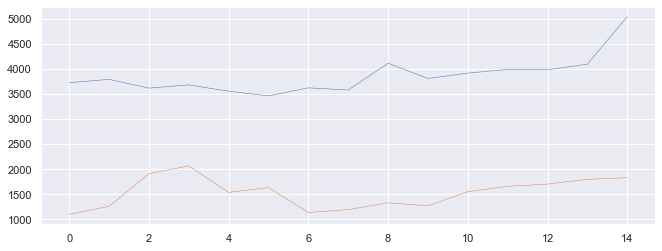

In [183]:
sns.set(rc={'figure.figsize':(11, 4)})
combine['close'].plot(linewidth=0.5);
combine['close_pred'].plot(linewidth=0.5);

# Other models using Darts

In [30]:
!pip install darts

In [184]:
from darts.models import RNNModel, NBEATSModel
from darts import TimeSeries
closets = TimeSeries.from_dataframe(dataset, value_cols = ['close'])
#sentts = TimeSeries.from_dataframe(dataset, value_cols = ['sentiment'])
sentts = TimeSeries.from_dataframe(dataset, value_cols = ['wsentiment'])
trainc = closets[:-n_obs]
trains = sentts[:-n_obs]
# train time series are differences once to make them stochastic
train_closetsd, val_closets = closets[:-n_obs].diff(1), closets[-n_obs:]
train_sentsd, val_sents = sentts[:-n_obs].diff(1), sentts[-n_obs:]


NBEATS = NBEATSModel(input_chunk_length=115, output_chunk_length=15, n_epochs=100, random_state=0)

NBEATS.fit([train_closetsd, train_sentsd])
pred = NBEATS.predict(n=15, series=train_closetsd)


#print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))

[2021-10-22 16:20:14,310] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 50 samples.
[2021-10-22 16:20:14,310] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 50 samples.
[2021-10-22 16:20:14,522] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-22 16:20:14,522] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


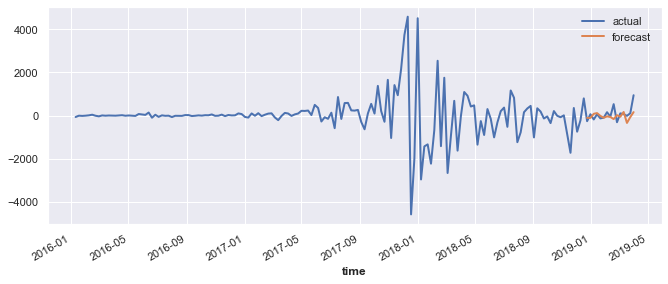

In [185]:
closed = closets.diff(1)
closed.plot(label = 'actual')
pred.plot(label = 'forecast')
plt.legend();


In [186]:
def dediff(traind, pred):
    lv = traind.last_value()
    pred["closef"] = lv + pred;
    return pred

p = dediff(trainc,pred.pd_dataframe(copy = False).cumsum())

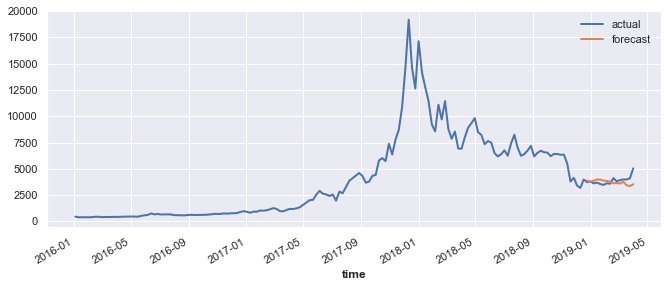

In [187]:
pts = TimeSeries.from_dataframe(p, value_cols = ['closef'])
closets.plot(label='actual')
pts.plot(label='forecast')
plt.legend();

In [188]:
RNN = RNNModel(input_chunk_length=115, output_chunk_length=15, n_epochs=100, random_state=0)
RNN.fit([train_closetsd, train_sentsd])
predRNN = RNN.predict(n=15, series=train_closetsd)


[2021-10-22 16:23:13,854] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 260 samples.
[2021-10-22 16:23:13,854] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 260 samples.
[2021-10-22 16:23:13,871] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-22 16:23:13,871] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


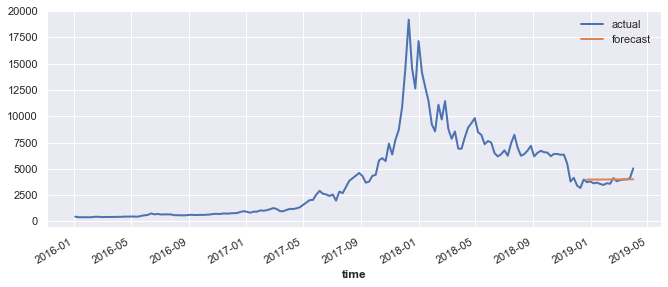

In [190]:
prnn= dediff(trainc,predRNN.pd_dataframe(copy = False).cumsum())
prnnts = TimeSeries.from_dataframe(prnn, value_cols = ['closef'])
closets.plot(label='actual')
prnnts.plot(label='forecast')
plt.legend()

[2021-10-22 16:23:54,357] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 50 samples.
[2021-10-22 16:23:54,357] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 50 samples.
[2021-10-22 16:23:54,369] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 5
[2021-10-22 16:23:54,369] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 5
[2021-10-22 16:23:54,384] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-22 16:23:54,384] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


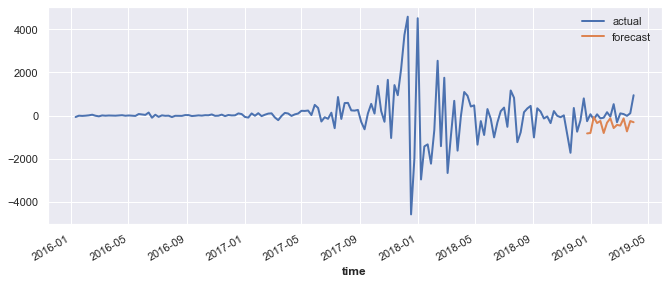

In [191]:
from darts.models import TCNModel
TCNM = TCNModel(input_chunk_length=115, output_chunk_length=15, n_epochs=100, random_state=0)
TCNM.fit([train_closetsd, train_sentsd])
predTCNM = TCNM.predict(n=15, series=train_closetsd)
closed.plot(label = 'actual')
predTCNM.plot(label = 'forecast')
plt.legend();



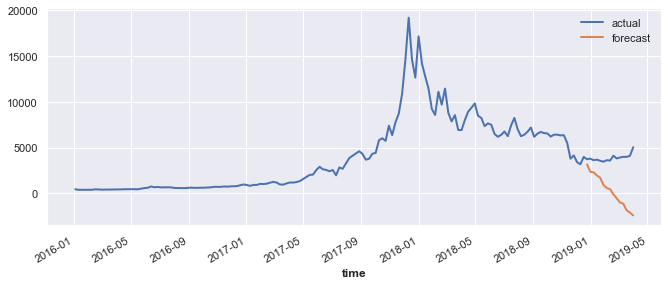

In [192]:
prtcnm= dediff(trainc,predTCNM.pd_dataframe(copy = False).cumsum())
prtcnmts = TimeSeries.from_dataframe(prtcnm, value_cols = ['closef'])
closets.plot(label='actual')
prtcnmts.plot(label='forecast')
plt.legend()

[2021-10-22 16:24:22,863] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 50 samples.
[2021-10-22 16:24:22,863] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 50 samples.
[2021-10-22 16:24:22,874] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-22 16:24:22,874] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


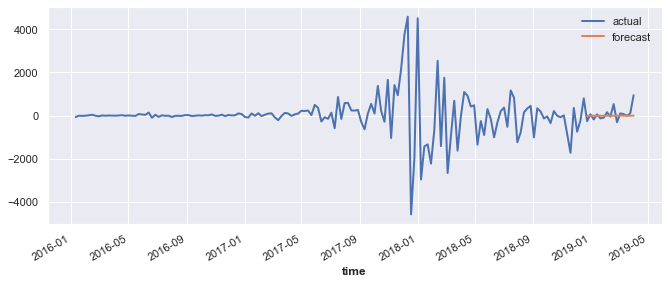

In [193]:
from darts.models import BlockRNNModel

BRNNM = BlockRNNModel(input_chunk_length=115, output_chunk_length=15, n_epochs=100, random_state=0)
BRNNM.fit([train_closetsd, train_sentsd])
predBRNNM = BRNNM.predict(n=15, series=train_closetsd)
closed.plot(label = 'actual')
predBRNNM.plot(label = 'forecast')
plt.legend();


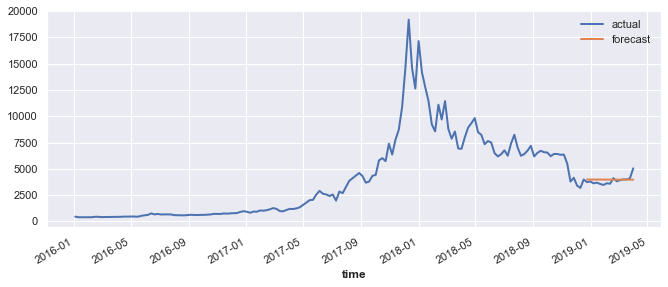

In [194]:
prtbr= dediff(trainc,predBRNNM.pd_dataframe(copy = False).cumsum())
prtbrts = TimeSeries.from_dataframe(prtbr, value_cols = ['closef'])
closets.plot(label='actual')
prtbrts.plot(label='forecast')
plt.legend()

[2021-10-22 16:24:46,209] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 50 samples.
[2021-10-22 16:24:46,209] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 50 samples.
[2021-10-22 16:24:46,299] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-22 16:24:46,299] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


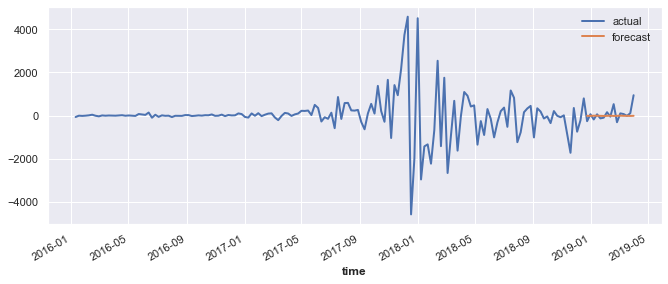

In [195]:
from darts.models import TransformerModel


TM = TransformerModel(input_chunk_length=115, output_chunk_length=15, n_epochs=100, random_state=0)
TM.fit([train_closetsd, train_sentsd])
predTM = TM.predict(n=15, series=train_closetsd)
closed.plot(label = 'actual')
predTM.plot(label = 'forecast')
plt.legend();

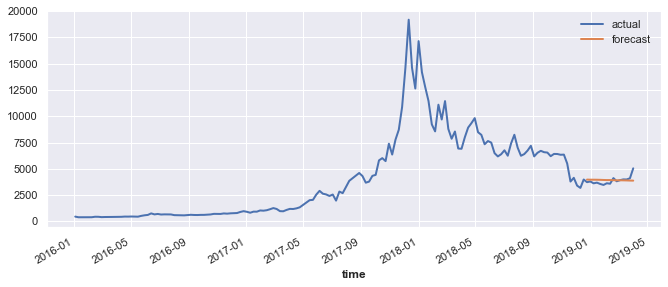

In [196]:
prtm= dediff(trainc,predTM.pd_dataframe(copy = False).cumsum())
prtms= TimeSeries.from_dataframe(prtm, value_cols = ['closef'])
closets.plot(label='actual')
prtms.plot(label='forecast')
plt.legend()

In [197]:
# VARIMA with darts
from darts.models.forecasting.varima import VARIMA
traints = TimeSeries.from_dataframe(dataset, value_cols = ['close', 'wsentiment'])
trainvar, varvalts = traints[:-n_obs], traints[-n_obs:]
var = VARIMA(p = 15, d= 1)
var.fit(trainvar)
pvar = var.predict(n = 15)

C:\Users\Emilia Marchese\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


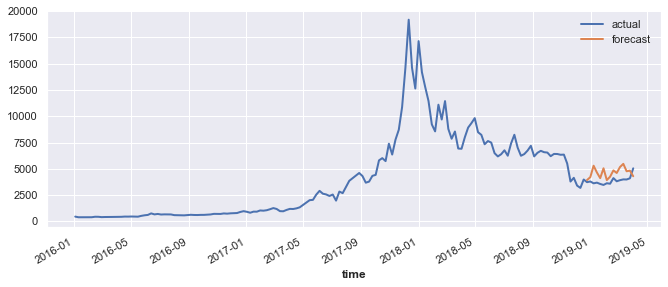

In [198]:
closets.plot(label='actual')
pvar['close'].plot(label='forecast')
plt.legend()

# Hyper parameter tuning for the darts models using grid search on first degree differenced items

In [199]:
# Evaluationg the different predictions using MAPE
from darts.metrics import mape
print('MAPE NBEATS= {:.2f}%'.format(mape(val_closets, pts)))
print('MAPE RNM= {:.2f}%'.format(mape(val_closets, prnnts)))
print('MAPE TCNM = {:.2f}%'.format(mape(val_closets, prtcnmts)))
print('MAPE BlockRNM = {:.2f}%'.format(mape(val_closets, prtbrts)))
print('MAPE TM = {:.2f}%'.format(mape(val_closets, prtms)))
print('MAPE VARIMA = {:.2f}%'.format(mape(val_closets, pvar['close'])))

MAPE NBEATS= 9.77%
MAPE RNM= 7.37%
MAPE TCNM = 90.02%
MAPE BlockRNM = 7.38%
MAPE TM = 7.43%
MAPE VARIMA = 22.48%


In [130]:
#NBEATS 
from darts.metrics import mape
traints = TimeSeries.from_dataframe(dataset, value_cols = ['close', 'sentiment'])
traind, valts = traints[:-n_obs].diff(1), traints[-n_obs:]
parametersnb = {
    "input_chunk_length":[60], 
    "output_chunk_length":[15], 
    "generic_architecture":[True,False],
    "num_stacks":[1,6,9,10],
    "num_blocks":[1,2,3],
    "num_layers":[1,2,3,4,5],
    "layer_widths": [50, 200, 300, 512],
    "n_epochs":[50,75, 100,125, 150],
    "nr_epochs_val_period":[1,2,3,4],
    "batch_size":[50,100,150,200,250,300],
    ##model_name:'nbeats_run'
}

bestNBEATSmodel = NBEATSModel.gridsearch(parameters = parametersnb, series= traind, forecast_horizon = 15, metric = mape, last_points_only = False)
bestNBEATSmodel.fit([train_closetsd, train_sentsd])
bestNBEATsforecast = bestNBEATSmodel.predict(n=15, series=train_closetsd)

[2021-10-22 12:14:31,131] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 2 samples.
[2021-10-22 12:14:31,131] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 2 samples.
[2021-10-22 12:14:31,146] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-22 12:14:31,146] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-22 12:14:31,898] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 3 samples.
[2021-10-22 12:14:31,898] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 3 samples.
[2021-10-22 12:14:32,567] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 4 sam

KeyboardInterrupt: 